In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df_injury = pd.read_csv('./data/injuries_2010-2020.csv')
df_injury

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD)
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL


In [ ]:
df_players = pd.read_csv('./data/players.csv')
df_players


,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


In [ ]:
df_rankings = pd.read_csv('./data/ranking.csv')
df_rankings


,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612744,0,22021,2021-11-17,West,Golden State,14,12,2,0.857,8-1,4-1,NaN
1,1610612756,0,22021,2021-11-17,West,Phoenix,14,11,3,0.786,6-2,5-1,NaN
2,1610612742,0,22021,2021-11-17,West,Dallas,14,9,5,0.643,6-1,3-4,NaN
3,1610612743,0,22021,2021-11-17,West,Denver,14,9,5,0.643,7-1,2-4,NaN
4,1610612746,0,22021,2021-11-17,West,LA Clippers,14,9,5,0.643,7-3,2-2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
198338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
198339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
198340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [ ]:
df_games = pd.read_csv('./data/games.csv')
df_games
#drop duplicate games 
df_games.drop_duplicates(subset='GAME_ID').reset_index(drop=True)
df_games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,0.286,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,0.351,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,0.375,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,0.375,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25019,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25020,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25021,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25022,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [ ]:
df_games_details = pd.read_csv('./data/games_details.csv')
df_games_details


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,1.0,6.0,0.167,0.0,5.0,0.000,1.0,1.0,1.000,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,2.0,12.0,0.167,1.0,8.0,0.125,0.0,0.0,0.000,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,9.0,12.0,0.750,0.0,0.0,0.000,2.0,5.0,0.400,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,9.0,20.0,0.450,5.0,11.0,0.455,1.0,1.0,1.000,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,0.0,5.0,0.000,0.0,4.0,0.000,0.0,0.0,0.000,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626106,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
626107,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
626108,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
626109,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [ ]:
df_games_merged = pd.merge(df_games, df_games_details, on='GAME_ID')
df_games_merged

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,1.0,6.0,0.167,0.0,5.0,0.000,1.0,1.0,1.0,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,2.0,12.0,0.167,1.0,8.0,0.125,0.0,0.0,0.0,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,9.0,12.0,0.750,0.0,0.0,0.000,2.0,5.0,0.4,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,9.0,20.0,0.450,5.0,11.0,0.455,1.0,1.0,1.0,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,0.0,5.0,0.000,0.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627521,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,203958,Andre Dawkins,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627522,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,203120,Justin Hamilton,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627523,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,204020,Tyler Johnson,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627524,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,201177,Josh McRoberts,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_games_merged.drop(df_games_merged[df_games_merged.SEASON < 2010].index, inplace=True)
df_games_merged

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,1.0,6.0,0.167,0.0,5.0,0.000,1.0,1.0,1.0,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,2.0,12.0,0.167,1.0,8.0,0.125,0.0,0.0,0.0,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,9.0,12.0,0.750,0.0,0.0,0.000,2.0,5.0,0.4,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,9.0,20.0,0.450,5.0,11.0,0.455,1.0,1.0,1.0,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,0.313,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,0.0,5.0,0.000,0.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627521,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,203958,Andre Dawkins,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627522,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,203120,Justin Hamilton,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627523,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,204020,Tyler Johnson,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627524,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,201177,Josh McRoberts,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_games_merged.drop(df_games_merged[df_games_merged.SEASON > 2020].index, inplace=True)
df_games_merged

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
8443,2021-07-20,42000406,Final,1610612749,1610612756,2020,1610612749,105.0,0.451,0.862,0.222,20.0,53.0,1610612756,98.0,0.442,0.842,0.240,14.0,37.0,1,1610612756,PHX,Phoenix,1628969,Mikal Bridges,Mikal,F,NaN,39:28,3.0,7.0,0.429,0.0,1.0,0.000,1.0,2.0,0.50,1.0,5.0,6.0,2.0,2.0,0.0,0.0,4.0,7.0,-18.0
8444,2021-07-20,42000406,Final,1610612749,1610612756,2020,1610612749,105.0,0.451,0.862,0.222,20.0,53.0,1610612756,98.0,0.442,0.842,0.240,14.0,37.0,1,1610612756,PHX,Phoenix,203109,Jae Crowder,Jae,F,NaN,40:33,4.0,11.0,0.364,2.0,9.0,0.222,5.0,5.0,1.00,2.0,11.0,13.0,0.0,4.0,1.0,2.0,3.0,15.0,4.0
8445,2021-07-20,42000406,Final,1610612749,1610612756,2020,1610612749,105.0,0.451,0.862,0.222,20.0,53.0,1610612756,98.0,0.442,0.842,0.240,14.0,37.0,1,1610612756,PHX,Phoenix,1629028,Deandre Ayton,Deandre,C,NaN,36:12,4.0,12.0,0.333,0.0,0.0,0.000,4.0,5.0,0.80,1.0,5.0,6.0,1.0,2.0,2.0,2.0,5.0,12.0,-7.0
8446,2021-07-20,42000406,Final,1610612749,1610612756,2020,1610612749,105.0,0.451,0.862,0.222,20.0,53.0,1610612756,98.0,0.442,0.842,0.240,14.0,37.0,1,1610612756,PHX,Phoenix,1626164,Devin Booker,Devin,G,NaN,46:15,8.0,22.0,0.364,0.0,7.0,0.000,3.0,3.0,1.00,0.0,3.0,3.0,5.0,0.0,0.0,6.0,4.0,19.0,-15.0
8447,2021-07-20,42000406,Final,1610612749,1610612756,2020,1610612749,105.0,0.451,0.862,0.222,20.0,53.0,1610612756,98.0,0.442,0.842,0.240,14.0,37.0,1,1610612756,PHX,Phoenix,101108,Chris Paul,Chris,G,NaN,39:13,11.0,19.0,0.579,1.0,2.0,0.500,3.0,4.0,0.75,1.0,1.0,2.0,5.0,1.0,0.0,3.0,5.0,26.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627521,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,203958,Andre Dawkins,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627522,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,203120,Justin Hamilton,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627523,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,204020,Tyler Johnson,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627524,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0,1610612748,MIA,Miami,201177,Josh McRoberts,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_teams = pd.read_csv('./data/teams.csv')
df_teams


,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [ ]:
from datetime import datetime

def string_to_datetime(date_str):
    datetime_object = datetime.strptime(date_str, '%Y-%m-%d')
    return datetime_object

df_games = pd.read_csv('./data/games.csv')
df_games
#drop duplicate games 
df_games.drop_duplicates(subset='GAME_ID').reset_index(drop=True)
df_games

df_games.drop(df_games[df_games.SEASON < 2010].index, inplace=True)
df_games

df_games.drop(df_games[df_games.SEASON > 2020].index, inplace=True)
df_games

df_games['GAME_DATE_EST'] = df_games['GAME_DATE_EST'].apply(string_to_datetime)
df_games

for ind in df_teams.index:
    df_games.loc[df_games.HOME_TEAM_ID == df_teams['TEAM_ID'][ind], "HOME_TEAM_ID"] = df_teams['ABBREVIATION'][ind]
    df_games.loc[df_games.VISITOR_TEAM_ID == df_teams['TEAM_ID'][ind], "VISITOR_TEAM_ID"] = df_teams['ABBREVIATION'][ind]

df_games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
289,2021-07-20,42000406,Final,MIL,PHX,2020,1610612749,105.0,0.451,0.862,0.222,20.0,53.0,1610612756,98.0,0.442,0.842,0.240,14.0,37.0,1
290,2021-07-17,42000405,Final,PHX,MIL,2020,1610612756,119.0,0.552,0.909,0.684,23.0,35.0,1610612749,123.0,0.575,0.529,0.500,26.0,37.0,0
291,2021-07-14,42000404,Final,MIL,PHX,2020,1610612749,109.0,0.402,0.828,0.241,22.0,48.0,1610612756,103.0,0.513,0.842,0.304,18.0,40.0,1
292,2021-07-11,42000403,Final,MIL,PHX,2020,1610612749,120.0,0.478,0.769,0.389,28.0,47.0,1610612756,100.0,0.482,0.688,0.290,21.0,36.0,1
293,2021-07-08,42000402,Final,PHX,MIL,2020,1610612756,118.0,0.489,0.857,0.500,26.0,43.0,1610612749,108.0,0.452,0.652,0.290,21.0,46.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25019,2014-10-06,11400007,Final,ATL,NOP,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25020,2014-10-06,11400004,Final,CHI,WAS,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25021,2014-10-06,11400005,Final,LAL,DEN,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25022,2014-10-05,11400002,Final,TOR,SAC,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


Summarize values for home and away during this time period by season

In [ ]:
df_mean = df_games[["PTS_home", "FG_PCT_home", "FT_PCT_home", "FG3_PCT_home", "AST_home", "REB_home", "PTS_away", "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away", "HOME_TEAM_WINS"]].mean()
df_mean['PTS_DIFF'] = df_mean[0] - df_mean[6]
df_mean['FG_PCT_DIFF'] = df_mean[1] - df_mean[7]
df_mean['FT_PCT_DIFF'] = df_mean[2] - df_mean[8]
df_mean['FG3_PCT_DIFF'] = df_mean[3] - df_mean[9]
df_mean['AST_DIFF'] = df_mean[4] - df_mean[10]
df_mean['REB_DIFF'] = df_mean[5] - df_mean[11]
df_mean = df_mean.drop(["PTS_home", "FG_PCT_home", "FT_PCT_home", "FG3_PCT_home", "AST_home", "REB_home", "PTS_away", "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away"])
df_mean

HOME_TEAM_WINS    0.582174
PTS_DIFF          2.597029
FG_PCT_DIFF       0.010406
FT_PCT_DIFF       0.001811
FG3_PCT_DIFF      0.007940
AST_DIFF          1.134301
REB_DIFF          1.153727
dtype: float64

In [ ]:
df_mean_seasons = df_games.groupby('SEASON')[["PTS_home", "FG_PCT_home", "FT_PCT_home", "FG3_PCT_home", "AST_home", "REB_home", "PTS_away", "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away", "HOME_TEAM_WINS"]].mean()
df_mean_seasons['PTS_diff'] = df_mean_seasons['PTS_home'] - df_mean_seasons["PTS_away"]
df_mean_seasons['FG_PCT_diff'] = df_mean_seasons['FG_PCT_home'] - df_mean_seasons["FG_PCT_away"]
df_mean_seasons['FT_PCT_diff'] = df_mean_seasons['FT_PCT_home'] - df_mean_seasons["FT_PCT_away"]
df_mean_seasons['FG3_PCT_diff'] = df_mean_seasons['FG3_PCT_home'] - df_mean_seasons["FG3_PCT_away"]
df_mean_seasons['AST_diff'] = df_mean_seasons['AST_home'] - df_mean_seasons["AST_away"]
df_mean_seasons['REB_diff'] = df_mean_seasons['REB_home'] - df_mean_seasons["REB_away"]

df_mean_seasons = df_mean_seasons.drop(columns=["PTS_home", "FG_PCT_home", "FT_PCT_home", "FG3_PCT_home", "AST_home", "REB_home", "PTS_away", "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away"])
df_mean_seasons

,HOME_TEAM_WINS,PTS_diff,FG_PCT_diff,FT_PCT_diff,FG3_PCT_diff,AST_diff,REB_diff
SEASON,,,,,,,
2010,0.612518,3.372011,0.013413,0.004220,0.006975,1.443038,1.047820
2011,0.594203,2.962862,0.012163,0.001540,0.006054,1.265399,1.439312
2012,0.614085,3.267606,0.013542,-0.005746,0.019896,1.387324,1.207042
2013,0.573931,2.473721,0.011231,0.010015,0.000989,1.107218,1.135950
2014,0.575458,2.279972,0.008735,0.003339,0.006322,1.071227,1.065585
2015,0.593927,2.947740,0.010609,0.005254,0.008598,1.165254,1.064266
2016,0.580783,3.110320,0.012670,0.000640,0.018954,1.483274,1.074021
2017,0.582489,2.294501,0.010182,-0.000242,0.001581,0.991317,1.232996
2018,0.587808,2.736575,0.010291,-0.000148,0.005959,1.078374,1.317852


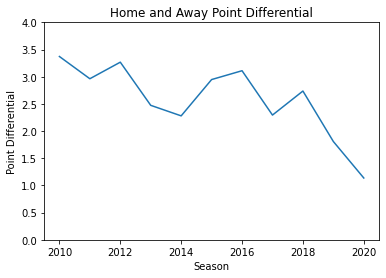

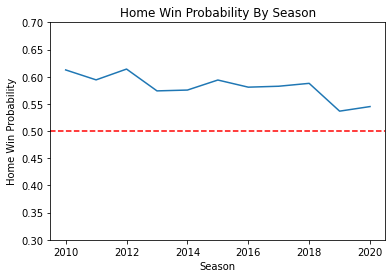

In [ ]:

f, ax = plt.subplots(1)
xdata = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
ydata = df_mean_seasons['PTS_diff']
ax.plot(xdata, ydata)
ax.set_ylim(ymin=0, ymax = 4)
plt.title('Home and Away Point Differential')
plt.ylabel('Point Differential')
plt.xlabel('Season')
plt.show(f)

f1, ax1 = plt.subplots(1)
xdata = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
ydata = df_mean_seasons['HOME_TEAM_WINS']
ax1.plot(xdata, ydata)
ax1.set_ylim(ymin=0.3, ymax=0.7)
plt.title('Home Win Probability By Season')
plt.ylabel('Home Win Probability')
plt.xlabel('Season')
plt.axhline(y=0.5, color='r', linestyle='dashed')
plt.show(f1)



In [ ]:
df_games['PTS_diff'] = df_games['PTS_home'] - df_games["PTS_away"]
df_games['FG_PCT_diff'] = df_games['FG_PCT_home'] - df_games["FG_PCT_away"]
df_games['FT_PCT_diff'] = df_games['FT_PCT_home'] - df_games["FT_PCT_away"]
df_games['FG3_PCT_diff'] = df_games['FG3_PCT_home'] - df_games["FG3_PCT_away"]
df_games['AST_diff'] = df_games['AST_home'] - df_games["AST_away"]
df_games['REB_diff'] = df_games['REB_home'] - df_games["REB_away"]

df_games_sorted = df_games.sort_values(by=['GAME_DATE_EST']).copy()
df_games_sorted

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,PTS_diff,FG_PCT_diff,FT_PCT_diff,FG3_PCT_diff,AST_diff,REB_diff
7803,2010-10-04,11000003,Final,MIN,LAL,2010,1610612750,111.0,0.541,0.719,0.667,26.0,37.0,1610612747,92.0,0.443,0.545,0.286,26.0,40.0,1,19.0,0.098,0.174,0.381,0.0,-3.0
7796,2010-10-05,11000007,Final,PHI,BKN,2010,1610612755,96.0,0.375,0.816,0.111,14.0,39.0,1610612751,103.0,0.507,0.657,0.667,24.0,48.0,0,-7.0,-0.132,0.159,-0.556,-10.0,-9.0
7802,2010-10-05,11000009,Final,SAC,PHX,2010,1610612758,109.0,0.517,0.722,0.353,24.0,47.0,1610612756,95.0,0.486,0.700,0.125,19.0,36.0,1,14.0,0.031,0.022,0.228,5.0,11.0
7801,2010-10-05,11000008,Final,POR,LAC,2010,1610612757,115.0,0.481,0.862,0.593,22.0,36.0,1610612746,86.0,0.438,0.739,0.250,17.0,35.0,1,29.0,0.043,0.123,0.343,5.0,1.0
7800,2010-10-05,11000010,Final,DAL,WAS,2010,1610612742,94.0,0.438,0.731,0.278,26.0,46.0,1610612764,97.0,0.468,0.690,0.278,19.0,37.0,0,-3.0,-0.030,0.041,0.000,7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2021-07-08,42000402,Final,PHX,MIL,2020,1610612756,118.0,0.489,0.857,0.500,26.0,43.0,1610612749,108.0,0.452,0.652,0.290,21.0,46.0,1,10.0,0.037,0.205,0.210,5.0,-3.0
292,2021-07-11,42000403,Final,MIL,PHX,2020,1610612749,120.0,0.478,0.769,0.389,28.0,47.0,1610612756,100.0,0.482,0.688,0.290,21.0,36.0,1,20.0,-0.004,0.081,0.099,7.0,11.0
291,2021-07-14,42000404,Final,MIL,PHX,2020,1610612749,109.0,0.402,0.828,0.241,22.0,48.0,1610612756,103.0,0.513,0.842,0.304,18.0,40.0,1,6.0,-0.111,-0.014,-0.063,4.0,8.0
290,2021-07-17,42000405,Final,PHX,MIL,2020,1610612756,119.0,0.552,0.909,0.684,23.0,35.0,1610612749,123.0,0.575,0.529,0.500,26.0,37.0,0,-4.0,-0.023,0.380,0.184,-3.0,-2.0


In [ ]:
def find_b2b(df_games_team):
    teams = df_games_team.HOME_TEAM_ID.unique()
    teams.sort()
    
    temp_dict = {
        'regular' : {'points': {}, 'wins': {}},
        'b2b' : {'points': {}, 'wins': {}},
        'difference' : {'points': {}, 'wins': {}}
    }

    for team in teams:
        df_games_temp = df_games_team[((df_games_team['HOME_TEAM_ID'] == team) | (df_games_team['VISITOR_TEAM_ID'] == team))].copy()

        df_temp = df_games_temp.copy()
        df_temp['diff'] = df_temp['GAME_DATE_EST'].diff()
        df_temp[df_temp['diff']=='1 days'].index

        temp_PTS_diff = []
        temp_FG_PCT_diff = []
        temp_FT_PCT_diff = []
        temp_FG3_PCT_diff = []
        temp_AST_diff = []
        temp_REB_diff = []
        temp_PTS_diff1 = []
        temp_win = []
        temp_FG_PCT_diff1 = []
        temp_FT_PCT_diff1 = []
        temp_FG3_PCT_diff1 = []
        temp_AST_diff1 = []
        temp_REB_diff1 = []
        temp_win1 = []

        for i in df_games_temp.index:
            if df_games_temp['HOME_TEAM_ID'][i] == team:
                temp_PTS_diff1.append(df_games_temp['PTS_diff'][i])
                temp_FG_PCT_diff1.append(df_games_temp['FG_PCT_diff'][i])
                temp_FT_PCT_diff1.append(df_games_temp['FT_PCT_diff'][i])
                temp_FG3_PCT_diff1.append(df_games_temp['FG3_PCT_diff'][i])
                temp_AST_diff1.append(df_games_temp['AST_diff'][i])
                temp_REB_diff1.append(df_games_temp['REB_diff'][i])
                temp_win1.append(df_games_temp['HOME_TEAM_WINS'][i])
            else:
                temp_PTS_diff1.append(-1*df_games_temp['PTS_diff'][i])
                temp_FG_PCT_diff1.append(-1*df_games_temp['FG_PCT_diff'][i])
                temp_FT_PCT_diff1.append(-1*df_games_temp['FT_PCT_diff'][i])
                temp_FG3_PCT_diff1.append(-1*df_games_temp['FG3_PCT_diff'][i])
                temp_AST_diff1.append(-1*df_games_temp['AST_diff'][i])
                temp_REB_diff1.append(-1*df_games_temp['REB_diff'][i])
                temp_win1.append((-1*df_games_temp['HOME_TEAM_WINS'][i])+1)

        temp_list1 = pd.DataFrame(
            {'PTS_diff': temp_PTS_diff1,
            'FG_PCT_diff': temp_FG_PCT_diff1,
            'FT_PCT_diff': temp_FT_PCT_diff1,
            "FG3_PCT_diff": temp_FG3_PCT_diff1,
            "AST_diff": temp_AST_diff1,
            "REB_diff": temp_REB_diff1,
            "WIN_PCT": temp_win1
            })

        df_temp_mean1 = temp_list1[["PTS_diff", "FG_PCT_diff", "FT_PCT_diff", "FG3_PCT_diff", "AST_diff", "REB_diff", "WIN_PCT"]].mean()
        print("Team:", team)
        print("Team Average")
        print(df_temp_mean1)
        print()

        for i in df_temp[df_temp['diff']=='1 days'].index:
            if df_temp['HOME_TEAM_ID'][i] == team:
                temp_PTS_diff.append(df_temp['PTS_diff'][i])
                temp_FG_PCT_diff.append(df_temp['FG_PCT_diff'][i])
                temp_FT_PCT_diff.append(df_temp['FT_PCT_diff'][i])
                temp_FG3_PCT_diff.append(df_temp['FG3_PCT_diff'][i])
                temp_AST_diff.append(df_temp['AST_diff'][i])
                temp_REB_diff.append(df_temp['REB_diff'][i])
                temp_win.append(df_temp['HOME_TEAM_WINS'][i])

            else:
                temp_PTS_diff.append(-1*df_temp['PTS_diff'][i])
                temp_FG_PCT_diff.append(-1*df_temp['FG_PCT_diff'][i])
                temp_FT_PCT_diff.append(-1*df_temp['FT_PCT_diff'][i])
                temp_FG3_PCT_diff.append(-1*df_temp['FG3_PCT_diff'][i])
                temp_AST_diff.append(-1*df_temp['AST_diff'][i])
                temp_REB_diff.append(-1*df_temp['REB_diff'][i])
                temp_win.append((-1*df_temp['HOME_TEAM_WINS'][i])+1)

        temp_list = pd.DataFrame(
            {'PTS_diff': temp_PTS_diff,
            'FG_PCT_diff': temp_FG_PCT_diff,
            'FT_PCT_diff': temp_FT_PCT_diff,
            "FG3_PCT_diff": temp_FG3_PCT_diff,
            "AST_diff": temp_AST_diff,
            "REB_diff": temp_REB_diff,
            "WIN_PCT": temp_win
            })

        df_temp_mean = temp_list[["PTS_diff", "FG_PCT_diff", "FT_PCT_diff", "FG3_PCT_diff", "AST_diff", "REB_diff", "WIN_PCT"]].mean()
        print("Team Average B2B")
        print(df_temp_mean)
        print()
        print("Difference")
        print(df_temp_mean1-df_temp_mean)
        print()

        temp_dict['regular']['points'][team] = df_temp_mean1['PTS_diff']
        temp_dict['regular']['wins'][team] = df_temp_mean1['WIN_PCT']
        temp_dict['b2b']['points'][team] = df_temp_mean['PTS_diff']
        temp_dict['b2b']['wins'][team] = df_temp_mean['WIN_PCT']
        temp_dict['difference']['points'][team] = df_temp_mean1['PTS_diff'] - df_temp_mean['PTS_diff']
        temp_dict['difference']['wins'][team] = df_temp_mean1['WIN_PCT']-df_temp_mean['WIN_PCT']

    return(temp_dict)



In [ ]:
b2b_dict = find_b2b(df_games_sorted)


In [ ]:
print(b2b_dict['difference'])

{'points': {'ATL': 0.32178217821782185, 'BKN': 3.600892194895493, 'BOS': 1.619459680441522, 'CHA': 2.9864149666143573, 'CHI': 0.3818872141969312, 'CLE': 2.2761892327109714, 'DAL': 2.0082424098671727, 'DEN': 3.0836350860491075, 'DET': 2.6513074384361515, 'GSW': 2.3240669240669245, 'HOU': 2.435650623885918, 'IND': 2.7164506752255795, 'LAC': 1.3281884176733156, 'LAL': 2.191151158089297, 'MEM': 0.1413987205051512, 'MIA': 1.0415938014248056, 'MIL': 2.4292974734333583, 'MIN': 1.9488402688402693, 'NOP': 2.5785747328752437, 'NYK': 0.4753420455914732, 'OKC': 2.576248785228377, 'ORL': 1.367315490673155, 'PHI': 2.9498739934845415, 'PHX': 1.7964372169521754, 'POR': 0.6763719258889996, 'SAC': 3.0822648138202653, 'SAS': 0.6162942802287064, 'TOR': 1.35505037676742, 'UTA': 2.292688828108563, 'WAS': 0.9571457459440118}, 'wins': {'ATL': 0.008910891089108919, 'BKN': 0.12893603624274957, 'BOS': 0.03708065858442311, 'CHA': 0.0844487522693006, 'CHI': -0.023417833902589336, 'CLE': 0.09096052574313446, 'DAL':

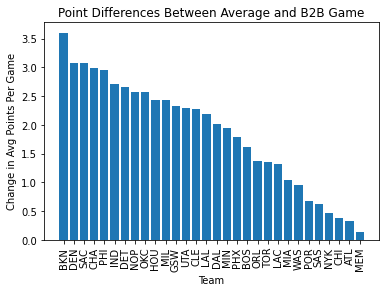

In [ ]:
{k: v for k, v in sorted(b2b_dict['difference']['points'].items(), key=lambda item: item[1])}

keysPoints = b2b_dict['difference']['points'].keys()
valuesPoints = b2b_dict['difference']['points'].values()

temp_dict = dict(sorted(b2b_dict['difference']['points'].items(), key=lambda item: item[1], reverse = True))
keysPoints = temp_dict.keys()
valuesPoints = temp_dict.values()


fig, ax = plt.subplots()
plt.title('Point Differences Between Average and B2B Game')
plt.bar(keysPoints, valuesPoints)
plt.xlabel('Team')
plt.ylabel('Change in Avg Points Per Game')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.show()

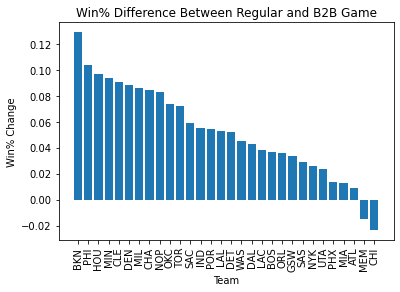

In [ ]:
temp_dict = dict(sorted(b2b_dict['difference']['wins'].items(), key=lambda item: item[1], reverse = True))
keysWins = temp_dict.keys()
valuesWins = temp_dict.values()

keysWins = temp_dict.keys()
valuesWins = temp_dict.values()

fig, ax = plt.subplots()
plt.title("Win% Difference Between Regular and B2B Game")
plt.bar(keysWins, valuesWins)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel('Team')
plt.ylabel('Win% Change')
plt.show()

In [ ]:
def find_b2b_players(df_games_team, df_games_players):
    teams = df_games_team.TEAM_ID_home.unique()
    teams.sort()
    temp_dict = {}
    temp_dataframe = df_games_team.copy()
    df_games_players_temp = df_games_players.copy()
    df_games_players_temp['b2b'] = 0

    #go through each team and find difference in time between games
    for team in teams:
        df_games_temp = df_games_team[((df_games_team['TEAM_ID_home'] == team) | (df_games_team['TEAM_ID_away'] == team))].copy()
        df_temp = df_games_temp.copy()
        #find time between each game
        df_temp['diff'] = df_temp['GAME_DATE_EST'].diff()

        #if diff = 1 day save game_id and team_id
        for i in df_temp[df_temp['diff']=='1 days'].index:
            temp_dict[df_temp['GAME_ID'][i]] = team

    for key in temp_dict:
        print(key)
        print(temp_dict[key])
        df_games_players_temp.loc[df_games_players_temp.ID == 103, ['FirstName', 'LastName']] = 'Matt', 'Jones'
    
    df_games_players_merged = pd.merge(temp_dataframe, df_games_players_temp, on='GAME_ID').copy()

    return()

In [ ]:
find_b2b_players(df_games_sorted, df_games_sorted)